## Exams Grade Prediction 

Using dataset downloaded from Kaggle https://www.kaggle.com/spscientist/students-performance-in-exams

### 0. Loading data, wrangling and analyzing data

In [85]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [86]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [87]:
print(df.dtypes)
print(); print(df.isna().sum())

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [88]:
df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace = True)

In [89]:
df.shape

(1000, 8)

In [90]:
col = df.loc[:,"math score":"writing score"]
df['mean results'] = col.mean(axis=1).round()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean results
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [91]:
df.shape

(1000, 9)

In [92]:
print(df['gender'].value_counts())
print(); print(df['race/ethnicity'].value_counts())
print(); print(df['parental level of education'].value_counts())
print(); print(df['lunch'].value_counts())
print(); print(df['test preparation course'].value_counts())

female    518
male      482
Name: gender, dtype: int64

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

standard        645
free/reduced    355
Name: lunch, dtype: int64

none         642
completed    358
Name: test preparation course, dtype: int64


In [93]:
mn,mx = df['mean results'].min(),df['mean results'].max()
print(mn,mx)

9.0 100.0


In [94]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]
df['group'] = pd.cut(df['mean results'], range(0, 105, 10), right=False, labels=labels)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean results,group
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,70 - 79
1,female,group C,some college,standard,completed,69,90,88,82.0,80 - 89
2,female,group B,master's degree,standard,none,90,95,93,93.0,90 - 99
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,40 - 49
4,male,group C,some college,standard,none,76,78,75,76.0,70 - 79


In [95]:
print(df.isna().sum())
df.dropna(inplace = True)
print(df.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
mean results                   0
group                          4
dtype: int64
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
mean results                   0
group                          0
dtype: int64


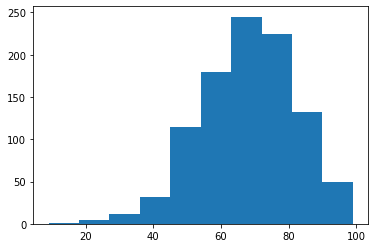

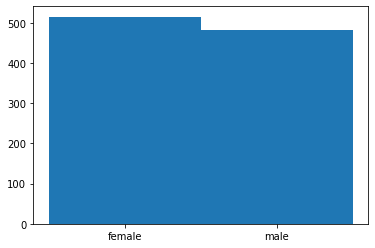

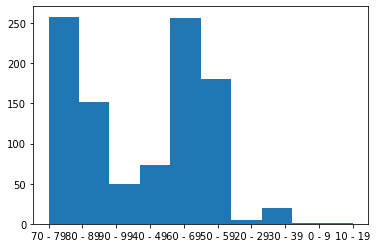

In [96]:
plt.hist(df['mean results'],bins=10)
plt.show()
plt.hist(df['gender'],bins=np.arange(3)-0.5)
plt.show()
plt.hist(df['group'])
plt.show()

In [97]:
print(df.groupby(['gender','group']).size())

gender  group  
female  0 - 9        1
        10 - 19      1
        20 - 29      2
        30 - 39     12
        40 - 49     22
        50 - 59     81
        60 - 69    129
        70 - 79    148
        80 - 89     82
        90 - 99     37
male    0 - 9        0
        10 - 19      0
        20 - 29      3
        30 - 39      8
        40 - 49     51
        50 - 59     99
        60 - 69    127
        70 - 79    110
        80 - 89     70
        90 - 99     13
dtype: int64


In [98]:
print(df.groupby(['race/ethnicity','group']).size())

race/ethnicity  group  
group A         0 - 9       0
                10 - 19     0
                20 - 29     1
                30 - 39     2
                40 - 49    13
                50 - 59    23
                60 - 69    23
                70 - 79    15
                80 - 89     8
                90 - 99     4
group B         0 - 9       0
                10 - 19     1
                20 - 29     2
                30 - 39     5
                40 - 49    18
                50 - 59    32
                60 - 69    59
                70 - 79    35
                80 - 89    31
                90 - 99     7
group C         0 - 9       1
                10 - 19     0
                20 - 29     1
                30 - 39     7
                40 - 49    21
                50 - 59    66
                60 - 69    79
                70 - 79    89
                80 - 89    39
                90 - 99    16
group D         0 - 9       0
                10 - 19     0
                

In [99]:
print(df.groupby(['parental level of education','group']).size())

parental level of education  group  
associate's degree           0 - 9       0
                             10 - 19     0
                             20 - 29     0
                             30 - 39     1
                             40 - 49    16
                             50 - 59    42
                             60 - 69    51
                             70 - 79    59
                             80 - 89    36
                             90 - 99    16
bachelor's degree            0 - 9       0
                             10 - 19     0
                             20 - 29     0
                             30 - 39     1
                             40 - 49     7
                             50 - 59    12
                             60 - 69    32
                             70 - 79    31
                             80 - 89    22
                             90 - 99    10
high school                  0 - 9       0
                             10 - 19     1
                 

In [100]:
print(df.groupby(['lunch','group']).size())

lunch         group  
free/reduced  0 - 9        1
              10 - 19      1
              20 - 29      3
              30 - 39     17
              40 - 49     38
              50 - 59     95
              60 - 69     88
              70 - 79     72
              80 - 89     36
              90 - 99      4
standard      0 - 9        0
              10 - 19      0
              20 - 29      2
              30 - 39      3
              40 - 49     35
              50 - 59     85
              60 - 69    168
              70 - 79    186
              80 - 89    116
              90 - 99     46
dtype: int64


In [101]:
print(df.groupby(['test preparation course','group']).size())

test preparation course  group  
completed                0 - 9        0
                         10 - 19      0
                         20 - 29      0
                         30 - 39      2
                         40 - 49     16
                         50 - 59     40
                         60 - 69     81
                         70 - 79    111
                         80 - 89     72
                         90 - 99     34
none                     0 - 9        1
                         10 - 19      1
                         20 - 29      5
                         30 - 39     18
                         40 - 49     57
                         50 - 59    140
                         60 - 69    175
                         70 - 79    147
                         80 - 89     80
                         90 - 99     16
dtype: int64


In [102]:
obj_df = df.select_dtypes(include=['object'])

obj_df['gender'] = obj_df['gender'].astype('category')
obj_df['race/ethnicity'] = obj_df['race/ethnicity'].astype('category')
obj_df['parental level of education'] = obj_df['parental level of education'].astype('category')
obj_df['lunch'] = obj_df['lunch'].astype('category')
obj_df['test preparation course'] = obj_df['test preparation course'].astype('category')

obj_df["gender_cat"] = obj_df["gender"].cat.codes
obj_df["race/ethnicity_cat"] = obj_df["race/ethnicity"].cat.codes
obj_df["parental level of education_cat"] = obj_df["parental level of education"].cat.codes
obj_df["lunch_cat"] = obj_df["lunch"].cat.codes
obj_df["test preparation course_cat"] = obj_df["test preparation course"].cat.codes

obj_df.head()

<ipython-input-102-2e772e95bd46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obj_df['gender'] = obj_df['gender'].astype('category')
<ipython-input-102-2e772e95bd46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obj_df['race/ethnicity'] = obj_df['race/ethnicity'].astype('category')
<ipython-input-102-2e772e95bd46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,gender,race/ethnicity,parental level of education,lunch,test preparation course,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat
0,female,group B,bachelor's degree,standard,none,0,1,1,1,1
1,female,group C,some college,standard,completed,0,2,4,1,0
2,female,group B,master's degree,standard,none,0,1,3,1,1
3,male,group A,associate's degree,free/reduced,none,1,0,0,0,1
4,male,group C,some college,standard,none,1,2,4,1,1


In [103]:
df_mean_cat = obj_df[['gender_cat','race/ethnicity_cat','parental level of education_cat','lunch_cat','test preparation course_cat']]
df_mean_cat.head()

,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat
0,0,1,1,1,1
1,0,2,4,1,0
2,0,1,3,1,1
3,1,0,0,0,1
4,1,2,4,1,1


In [104]:
df_mean_cat['mean results'] = df['mean results']
df_mean_cat.head()

<ipython-input-104-601c45909cf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mean_cat['mean results'] = df['mean results']


,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat,mean results
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


In [105]:
df_mean_cat.corr()

,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat,mean results
gender_cat,1.000000,0.001452,-0.000131,0.022824,-0.004512,-0.128842
race/ethnicity_cat,0.001452,1.000000,-0.026107,0.042116,-0.015746,0.173127
parental level of education_cat,-0.000131,-0.026107,1.000000,0.009176,-0.024633,-0.072203
lunch_cat,0.022824,0.042116,0.009176,1.000000,0.017989,0.286516
test preparation course_cat,-0.004512,-0.015746,-0.024633,0.017989,1.000000,-0.257766
mean results,-0.128842,0.173127,-0.072203,0.286516,-0.257766,1.000000


In [106]:
df['group'].replace({'0 - 9':1,'10 - 19':2 ,'20 - 29':3,'30 - 39':4,'40 - 49':5 ,'50 - 59':6,
                    '60 - 69':7,'70 - 79':8,'80 - 89':9 ,'90 - 99':10}, inplace=True)

In [107]:
df2 = df_mean_cat[['gender_cat','race/ethnicity_cat','parental level of education_cat','lunch_cat','test preparation course_cat']]

In [108]:
df2['group'] = df[['group']]

In [109]:
df2.head()

,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat,group
0,0,1,1,1,1,8
1,0,2,4,1,0,9
2,0,1,3,1,1,10
3,1,0,0,0,1,5
4,1,2,4,1,1,8


### 1. Multivariate Logistic Regression

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Creating X and y arrays
X = df2[['gender_cat','race/ethnicity_cat','parental level of education_cat','lunch_cat','test preparation course_cat']].values
y = df2[['group']].values.astype(int)

# Normalizing X
X = StandardScaler().fit(X).transform(X)

# Setting training and test data from the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True);

# Fitting the classification model
clf = LogisticRegression(multi_class = 'multinomial').fit(X_train, y_train)

# Predicted values from X_test
y_hat = clf.predict(X_test)

# Metrics
from sklearn.metrics import accuracy_score
print("logisticRegression Accuracy: ", accuracy_score(y_test, y_hat))

logisticRegression Accuracy:  0.315


C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### 2. Multivariate linear regression

74.0


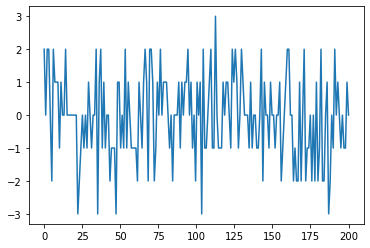

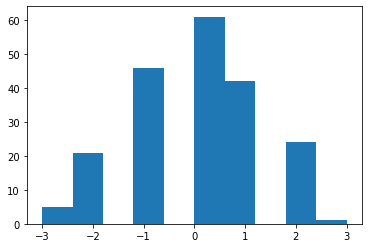

In [133]:
from sklearn.linear_model import LinearRegression

# Linear model setting, fitting and predicted values
lr = LinearRegression();
lr = lr.fit(X_train,y_train);

y_hat = lr.predict(X_test);

# Results obtained and plotting
results = (y_test - y_hat).round();
aa = (results == 0).sum()+(results == -1).sum()+(results == 1).sum()
bb = ((aa/(200))*100).round()
print(bb)
xx = np.linspace(0,200,num=200);

plt.plot(xx,results)
plt.show()

plt.hist(results)
plt.show()

In [113]:
# Calculating R**2 and R**2 adjusted
SS_Residual = sum((y_test-y_hat)**2)       
SS_Total = sum((y_test-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

[0.19168886] [0.8375213]
